# Analysis of HOME housing discrimination cases since August, 2003

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [176]:
discrim = pd.read_csv('discrim_zips.csv')

In [177]:
discrim.head()

,IntakeID,PropZip,ProtectedBasis,Date,Zip
0,249,14213,National Origin,11-Aug-03,14202
1,312,14211,Familial Status,11-Aug-03,14225
2,324,14220,Race,11-Aug-03,14220
3,324,14220,Color,11-Aug-03,14220
4,348,14225,Disability,14-Aug-03,14225


In [178]:
discrim['Date'] = pd.to_datetime(discrim['Date'])

In [179]:
discrim.head()

,IntakeID,PropZip,ProtectedBasis,Date,Zip
0,249,14213,National Origin,2003-08-11,14202
1,312,14211,Familial Status,2003-08-11,14225
2,324,14220,Race,2003-08-11,14220
3,324,14220,Color,2003-08-11,14220
4,348,14225,Disability,2003-08-14,14225


In [180]:
discrim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3966 entries, 0 to 3965
Data columns (total 5 columns):
IntakeID          3966 non-null int64
PropZip           3966 non-null int64
ProtectedBasis    3931 non-null object
Date              3965 non-null datetime64[ns]
Zip               3966 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 155.0+ KB


In [181]:
discrim.rename({'IntakeID': 'intake', 'PropZip': 'prop_zip', 'ProtectedBasis': 'basis', 'Date': 'date', 'Zip': 'zip'}, axis = 1, inplace=True)

In [182]:
discrim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3966 entries, 0 to 3965
Data columns (total 5 columns):
intake      3966 non-null int64
prop_zip    3966 non-null int64
basis       3931 non-null object
date        3965 non-null datetime64[ns]
zip         3966 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 155.0+ KB


In [183]:
discrim['basis'] = discrim['basis'].map({'Disability': 'dis', 'National Origin': 'no', 'Religion': 'rel', 'Sexual Orientation': 'so',
                     'Color': 'col', 'Race': 'race', 'Marital Status': 'ms', 'Age': 'age', 'Familial Status': 'fs',
                      'Source of Income': 'soi', 'Sex': 'sex', 'Other': 'oth', 'Gender ID and Expression': 'gie',
                      'Military Status': 'mil'
                     })

In [184]:
discrim['basis'].unique()

array(['no', 'fs', 'race', 'col', 'dis', 'soi', 'age', 'ms', 'sex', 'oth',
       'so', nan, 'rel', 'gie', 'mil'], dtype=object)

In [185]:
discrim.dropna(inplace=True)

In [186]:
discrim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3930 entries, 0 to 3965
Data columns (total 5 columns):
intake      3930 non-null int64
prop_zip    3930 non-null int64
basis       3930 non-null object
date        3930 non-null datetime64[ns]
zip         3930 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 184.2+ KB


In [187]:
discrim['intake'].unique().shape

(2473,)

In [188]:
# Keep date column but add separate columns for month and year
discrim['year'] = discrim['date'].dt.year
discrim['month'] = discrim['date'].dt.month

In [189]:
soi = discrim.loc[discrim['basis'] == 'soi',:]

In [190]:
soi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 6 to 3965
Data columns (total 7 columns):
intake      767 non-null int64
prop_zip    767 non-null int64
basis       767 non-null object
date        767 non-null datetime64[ns]
zip         767 non-null int64
year        767 non-null int64
month       767 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 47.9+ KB


In [191]:
race = discrim.loc[discrim['basis'] == 'race',:]
race.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 2 to 3951
Data columns (total 7 columns):
intake      607 non-null int64
prop_zip    607 non-null int64
basis       607 non-null object
date        607 non-null datetime64[ns]
zip         607 non-null int64
year        607 non-null int64
month       607 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 37.9+ KB


In [192]:
dis = discrim.loc[discrim['basis'] == 'dis',:]
dis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 4 to 3964
Data columns (total 7 columns):
intake      602 non-null int64
prop_zip    602 non-null int64
basis       602 non-null object
date        602 non-null datetime64[ns]
zip         602 non-null int64
year        602 non-null int64
month       602 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 37.6+ KB


In [193]:
fs = discrim.loc[discrim['basis'] == 'fs',:]
fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 1 to 3962
Data columns (total 7 columns):
intake      683 non-null int64
prop_zip    683 non-null int64
basis       683 non-null object
date        683 non-null datetime64[ns]
zip         683 non-null int64
year        683 non-null int64
month       683 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 42.7+ KB


In [194]:
unique_discrim = discrim.drop_duplicates('intake')

In [195]:
unique_discrim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473 entries, 0 to 3965
Data columns (total 7 columns):
intake      2473 non-null int64
prop_zip    2473 non-null int64
basis       2473 non-null object
date        2473 non-null datetime64[ns]
zip         2473 non-null int64
year        2473 non-null int64
month       2473 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 154.6+ KB


# Data setup

The data comes from HOME's intake database, which begins on August 11, 2003. This dataset contains all of the discrimination intakes between then and June 8, 2020. It contains 3930 entries, which represent 2473 unique reports of discrimination. Unique intakes only are contained in the `unique_discrim` dataframe, which should be used only for total discrimination cases in a zip code, not for discrimination bases.

So far, I have read in the csv file into a dataframe called `discrim`, which contains 5 columns:
- `intake`, which is the unique intake number for each discrim case
    - each entry is not a unique intake, as some intakes have more than one basis, and therefore take up more than one entry
- `prop_zip`, which is the ZIP code of the property at which the discrimination occurred
- `basis`, the basis of discrimination, which is one of the protected classes
- `date`, the date on which the intake was recorded
- `zip`, the ZIP code associated with the client for the intake
    - this could be faulty, as the client may have moved since the original discrim intake, and it may be a HOME v. case
    
## Subsets of `discrim` dataframe

I created a subset of the dataframe for each of the four most common discrimination bases: **Source of Income** (`soi`), **Race/Color** (`race`), **Disability** (`dis`), and **Familial Status** (`fs`). These subsets each have only a single intake associated with each entry. They have the following number of intakes:
- `soi`: 767 incidents
- `race`: 607 incidents
- `dis`: 602 incidents
- `fs`: 683 incidents

In [196]:
# Preliminary exploration
soi_zips = soi['prop_zip'].value_counts()
fs_zips = fs['prop_zip'].value_counts()
dis_zips = dis['prop_zip'].value_counts()
race_zips = race['prop_zip'].value_counts()
ovr_zips = unique_discrim['prop_zip'].value_counts()

In [197]:
top_soi = soi_zips.head(10)
top_soi_source = soi['zip'].value_counts().head(10)
print(top_soi)
print(top_soi_source)

14215    105
14216     69
14211     55
14214     51
14213     45
14207     43
14220     31
14225     31
14212     30
14206     29
Name: prop_zip, dtype: int64
14209    134
14215     92
14202     70
14211     50
14213     33
14207     33
14208     32
14206     27
14214     24
14212     23
Name: zip, dtype: int64


In [198]:
top_fs = fs_zips.head(10)
top_fs_source = fs['zip'].value_counts().head(10)
print(top_fs)
print(top_fs_source)

14215    82
14214    62
14216    57
14213    47
14207    33
14226    31
14222    25
14211    24
14208    22
14217    20
Name: prop_zip, dtype: int64
14202    166
14209    153
14215     45
14211     40
14213     23
14214     20
14207     19
14216     17
14120     14
14208     12
Name: zip, dtype: int64


In [199]:
top_dis = dis_zips.head(10)
top_dis_source = dis['zip'].value_counts().head(10)
print(top_dis)
print(top_dis_source)

14207    31
14075    27
14201    27
14215    26
14222    26
14211    23
14228    23
14213    23
14226    21
14225    20
Name: prop_zip, dtype: int64
14209    67
14215    30
14201    27
14207    26
14222    21
14228    21
14213    21
14075    20
14211    19
14202    18
Name: zip, dtype: int64


In [200]:
top_race = race_zips.head(10)
top_race_source = race['zip'].value_counts().head(10)
print(top_race)
print(top_race_source)

14216    48
14215    44
14207    31
14206    29
14228    27
14214    26
14225    23
14222    23
14221    22
14201    21
Name: prop_zip, dtype: int64
14215    70
14202    43
14209    42
14211    32
14207    28
14213    28
14216    27
14214    25
14201    20
14222    20
Name: zip, dtype: int64


In [201]:
top_discrim = ovr_zips.head(10)
top_discrim_source = unique_discrim['zip'].value_counts().head(10)
print(top_discrim)
print(top_discrim_source)

14215    230
14216    168
14214    144
14213    132
14207    124
14211    106
14222     90
14201     89
14226     78
14228     76
Name: prop_zip, dtype: int64
14209    346
14202    286
14215    215
14211    121
14207     99
14213     96
14214     80
14216     69
14201     67
14208     64
Name: zip, dtype: int64


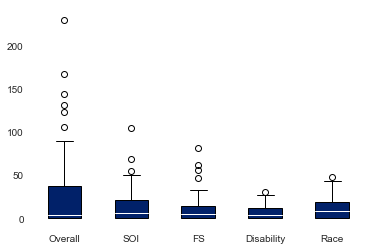

In [202]:
# Box plots of ZIP counts
home_blue = (1/255,33/255,105/255)
zips_types = [ovr_zips, soi_zips, fs_zips, dis_zips, race_zips]
zips_labels = ["Overall", 'SOI', 'FS', 'Disability', 'Race']
fig, ax = plt.subplots()
ax.boxplot(zips_types, patch_artist=True, boxprops=dict(facecolor=home_blue), medianprops=dict(color='white'))
ax.set_xticklabels(zips_labels)
for key,spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

# Overview of most common ZIP codes for discrimination complaints, 2003-2020

|Overall|SOI|Disability|Race|Familial Status|
|:---:|:---:|:---:|:---:|:---:|
|14215|14215|14207|14216|14215|
|14216|14216|14075|14215|14214|
|14214|14211|14201|14207|14216|
|14213|14214|14215|14206|14213|
|14207|14213|14222|14228|14207|
|14211|14207|14211|14214|14226|
|14222|14220|14228|14225|14222|
|14201|14225|14213|14222|14211|
|14226|14212|14226|14221|14208|
|14228|14206|14225|14201|14217|

**Observations of note:**
- 14216 and 14215 are both in the top 3 ZIP codes for 3 of 4 types of discrimination, plus overall
    - 14215 is centered on Bailey Ave and the 33 and includes University Heights, NW Cheektowaga, etc.
    - 14216 is most of North Buffalo
- The list of top ZIPs for discrimination is significantly different for disability discrimination than for SOI, race, or FS
    - While 14207 (Black Rock/Riverside) is high on the other lists, it is #1 for disability discrimination
    - 14216 is in the top 3 for all other types of discrimination but is not in the top 10 for disability discrimination
    - 14075 (Hamburg/Boston) is #2 for disability but doesn't crack the top 10 overall
- 14213 (West Side) and 14214 (north of 198 on either side of Main St) round out the top 5 ZIP codes for discrimination
- The top 5 ZIP codes account for 798 of the 2,473 total discrimination reports (32.3%) and the top 10 1,237 (50%)
- Some types of discrimination are concentrated in fewer ZIP codes, which can be seen in the table below or the boxplots above:

|Basis|Number in top 5|Total|Percent|
|---|---|---|---|
|Overall|798|2,473|32.3%|
|Disability|137|602|22.8%|
|Race|179| 607|29.5%|
|Familial Status|281|683|41.1%|
|Source of Income|325|767|42.4%|

In [203]:
# Exploring cases per year
soi_years = soi['year'].value_counts().sort_index()
print(soi_years)

2003      7
2004     12
2005      7
2006     31
2007     31
2008     46
2009     60
2010     44
2011     37
2012     45
2013     40
2014     59
2015     65
2016     42
2017     45
2018     69
2019    111
2020     16
Name: year, dtype: int64


In [204]:
fs_years = fs['year'].value_counts().sort_index()
print(fs_years)

2003    23
2004    65
2005    41
2006    36
2007    29
2008    30
2009    54
2010    57
2011    59
2012    53
2013    34
2014    35
2015    20
2016    20
2017    71
2018    29
2019    23
2020     4
Name: year, dtype: int64


In [205]:
dis_years = dis['year'].value_counts().sort_index()
print(dis_years)

2003    30
2004    54
2005    47
2006    33
2007    27
2008    27
2009    26
2010    21
2011    21
2012    42
2013    25
2014    32
2015    45
2016    49
2017    42
2018    21
2019    47
2020    13
Name: year, dtype: int64


In [206]:
race_years = race['year'].value_counts().sort_index()
print(race_years)

2003    26
2004    62
2005    45
2006    60
2007    38
2008    42
2009    36
2010    36
2011    30
2012    39
2013    25
2014    28
2015    39
2016    32
2017    23
2018    24
2019    18
2020     4
Name: year, dtype: int64


In [207]:
ovr_years = unique_discrim['year'].value_counts().sort_index()
print(ovr_years)

2003     80
2004    183
2005    134
2006    156
2007    136
2008    141
2009    158
2010    147
2011    141
2012    162
2013    110
2014    149
2015    151
2016    116
2017    160
2018    126
2019    186
2020     37
Name: year, dtype: int64


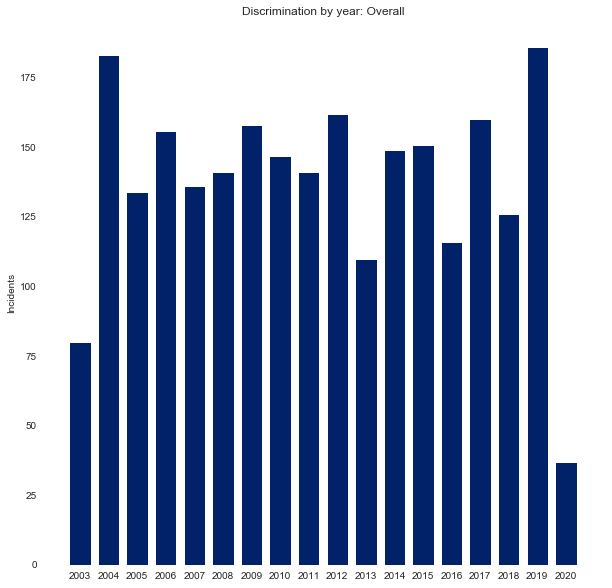

In [208]:
# Overall reports per year
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)
ax1.bar((np.arange(18)+0.75), ovr_years, width=0.75, color=home_blue)
ax1.set_xticks(np.arange(18)+0.75)
ax1.set_xticklabels(ovr_years.index)
ax1.set_ylabel('Incidents')
ax1.set_title('Discrimination by year: Overall')
for key,spine in ax1.spines.items():
    spine.set_visible(False)
ax1.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()

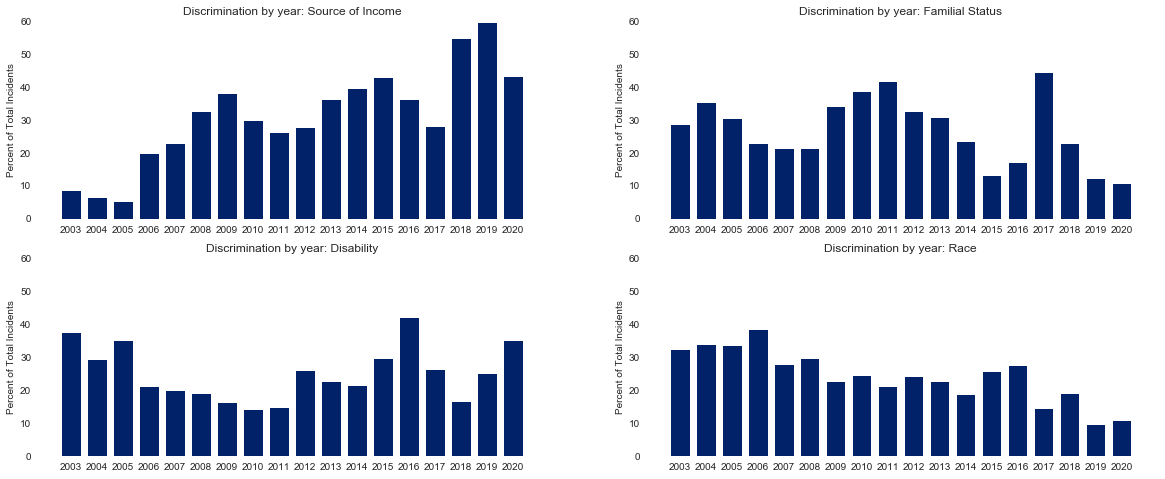

In [209]:
# Reports per year for the four most common bases of discrimination
fig = plt.figure(figsize=(20,8))
discrim_bases = [soi_years, fs_years, dis_years, race_years]
names = ['Source of Income', 'Familial Status', 'Disability', 'Race']
for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    ax.bar((np.arange(18)+0.75), (discrim_bases[i]/ovr_years)*100, width=0.75, color=home_blue)
    ax.set_xticks(np.arange(18)+0.75)
    ax.set_xticklabels(discrim_bases[i].index)
    ax.set_ylabel('Percent of Total Incidents')
    ax.set_title('Discrimination by year: ' + names[i])
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_ylim(0,60)
plt.show()

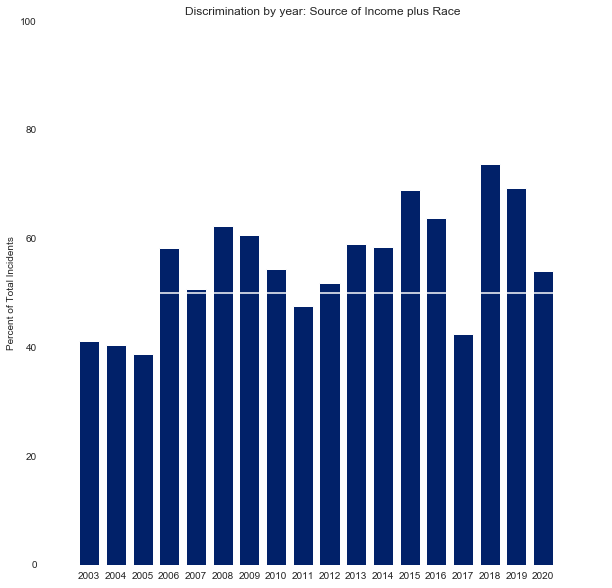

In [210]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
# SOI plus Race to see if the downward trend of racial discrimination is partly explained by a rise in SOI
ax.bar((np.arange(18)+0.75), ((soi_years+race_years)/ovr_years)*100, width=0.75, color=home_blue)
ax.set_xticks(np.arange(18)+0.75)
ax.set_xticklabels(soi_years.index)
ax.set_ylabel('Percent of Total Incidents')
ax.set_title('Discrimination by year: Source of Income plus Race')
for key,spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_ylim(0,100)
fifty = np.array([50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50])
ax.plot(fifty,color='white')
plt.show()

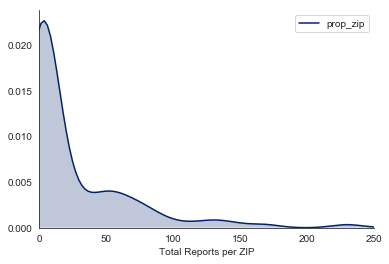

In [211]:
# Concentration of discrimination reports by ZIP code
import seaborn as sns
sns.set_style('white')
sns.kdeplot(unique_discrim['prop_zip'].value_counts(), shade=True, color=home_blue)
sns.despine()
plt.xlabel('Total Reports per ZIP')
plt.xlim((0,250))
plt.show()

(33144,
 5,
 [-176.684712, -14.37374, 0.0, 0.0],
 [145.830418, 71.341324, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x120dad7b8>)

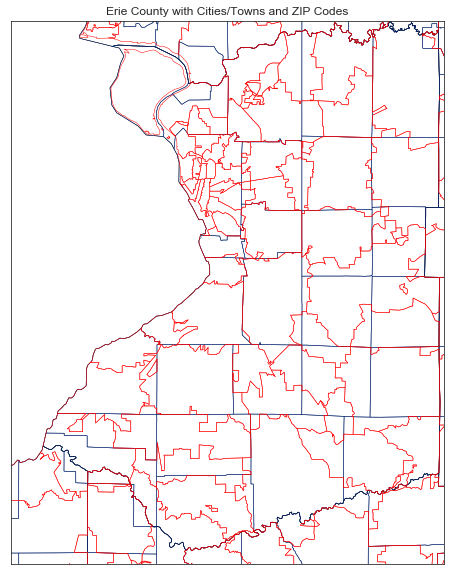

In [38]:
# Playing around with Basemap, decided not to use it and opt for folium instead
# DO NOT RUN THIS OR THE NEXT CODE BLOCK AS THEY ARE SLOW TO LOAD
from mpl_toolkits.basemap import Basemap
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Erie County with Cities/Towns and ZIP Codes')
ec = Basemap(projection='merc', llcrnrlat=42.421236, llcrnrlon=-79.191994, urcrnrlat=43.099789, urcrnrlon=-78.455910)
ec.readshapefile(shapefile='/Users/Steven/*My Folders/Python/counties/cb_2019_us_county_500k', name='counties')
ec.readshapefile(shapefile='/Users/Steven/*My Folders/Python/county_sub/cb_2019_36_cousub_500k', name='county_subs', color=home_blue)
ec.readshapefile(shapefile='/Users/Steven/*My Folders/Python/zips/cb_2019_us_zcta510_500k', name='zips', color='red')

(33144,
 5,
 [-176.684712, -14.37374, 0.0, 0.0],
 [145.830418, 71.341324, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x1a5138b860>)

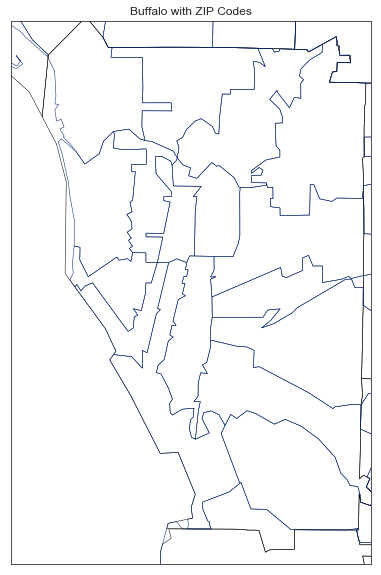

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Buffalo with ZIP Codes')
buf = Basemap(projection='merc', llcrnrlat=42.822984, llcrnrlon=-78.925556, urcrnrlat=42.965596, urcrnrlon=-78.796466)
buf.readshapefile(shapefile='/Users/Steven/*My Folders/Python/county_sub/cb_2019_36_cousub_500k', name='cities')
buf.readshapefile(shapefile='/Users/Steven/*My Folders/Python/zips/cb_2019_us_zcta510_500k', name='zips', color=home_blue)

In [212]:
import folium

# Create dataframe versions of series containing discrim counts for each ZIP code
zip_counts = pd.DataFrame({'prop_zip': ovr_zips.index, 'count': ovr_zips.values})
zip_counts['prop_zip'] = zip_counts['prop_zip'].astype(str)

soi_zip_counts = pd.DataFrame({'prop_zip': soi_zips.index, 'count': soi_zips.values})
soi_zip_counts['prop_zip'] = zip_counts['prop_zip'].astype(str)

fs_zip_counts = pd.DataFrame({'prop_zip': fs_zips.index, 'count': fs_zips.values})
fs_zip_counts['prop_zip'] = zip_counts['prop_zip'].astype(str)

dis_zip_counts = pd.DataFrame({'prop_zip': dis_zips.index, 'count': dis_zips.values})
dis_zip_counts['prop_zip'] = zip_counts['prop_zip'].astype(str)

race_zip_counts = pd.DataFrame({'prop_zip': race_zips.index, 'count': race_zips.values})
race_zip_counts['prop_zip'] = zip_counts['prop_zip'].astype(str)

In [213]:
# Create GEOJSON file of all ZIP codes in New York to overlay on map
import json
ny_zips = json.load(open('new-york-zip-codes.geojson'))

In [214]:
# Add features to GEOJSON noted below in order to add discrim counts to the GEOJSON,
# allowing construction of a tooltip popup on the map showing these numbers
for row in ny_zips['features']:
    props = row['properties']
    code = props['NAME']
    # Counts for total discrim
    if code in list(zip_counts['prop_zip']):
        props['tot_count'] = str(zip_counts[zip_counts['prop_zip']==code].iloc[0,1])
    else:
        props['tot_count'] = '0'
    # Counts for SOI discrim
    if code in list(soi_zip_counts['prop_zip']):
        props['soi_count'] = str(soi_zip_counts[soi_zip_counts['prop_zip']==code].iloc[0,1])
    else:
        props['soi_count'] = '0'
    # Counts for FS discrim
    if code in list(fs_zip_counts['prop_zip']):
        props['fs_count'] = str(fs_zip_counts[fs_zip_counts['prop_zip']==code].iloc[0,1])
    else:
        props['fs_count'] = '0'
    # Counts for Disability discrim
    if code in list(dis_zip_counts['prop_zip']):
        props['dis_count'] = str(dis_zip_counts[dis_zip_counts['prop_zip']==code].iloc[0,1])
    else:
        props['dis_count'] = '0'
    # Counts for race discrim
    if code in list(race_zip_counts['prop_zip']):
        props['race_count'] = str(race_zip_counts[race_zip_counts['prop_zip']==code].iloc[0,1])
    else:
        props['race_count'] = '0'
    # Create 'Other Discrim' count--DID NOT USE; INCORRECT DUE TO MULTIPLE BASES PER COMPLAINT
    props['other_count'] = str(int(props['tot_count'])-(int(props['soi_count'])+int(props['fs_count'])+int(props['dis_count'])+int(props['race_count'])))

In [215]:
ny_zips['features'][900]['properties']

{'AREA': '0.00023',
 'PERIMETER': '0.19097',
 'ZT36_D00_': '902',
 'ZT36_D00_I': '901',
 'ZCTA': '14202',
 'NAME': '14202',
 'LSAD': 'Z5',
 'LSAD_TRANS': '5-Digit ZCTA',
 'tot_count': '48',
 'soi_count': '9',
 'fs_count': '10',
 'dis_count': '12',
 'race_count': '11',
 'other_count': '6'}

In [317]:
# Create an interactive map showing discrimination reports by ZIP code
buf = folium.Map(location=[42.899733, -78.856891], max_zoom=18, zoom_start=12)
bins_tot = [1,5,10,25,50,100,150,230]
bins_soi = [1,5,10,25,50,105]
bins_dis = [1,5,10,25,31]
bins_fs = [1,5,10,25,50,82]
bins_race = [1,5,10,25,48]

# Create layer on map plus tooltip popup with total number of discrimination reports per ZIP code
# This layer is the only one to display on loading the map, the others can be toggled on if desired
tot_discrim = folium.Choropleth(
    geo_data=ny_zips,
    name='All Discrim',
    data=zip_counts,
    columns=['prop_zip', 'count'],
    key_on='feature.properties.ZCTA',
    highlight=True,
    fill_opacity=0.7,
    line_opacity=0.2,
    bins=[float(x) for x in bins_tot],
    legend_name='Total Discrimination Reports by ZIP Code since 2003'
).add_to(buf)

# SOI layer
soi_discrim = folium.Choropleth(
    geo_data=ny_zips,
    name='SOI Discrim',
    data=soi_zip_counts,
    columns=['prop_zip', 'count'],
    key_on='feature.properties.ZCTA',
    highlight=True,
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Source of Income Discrimination Reports by ZIP Code since 2003',
    show=False,
    bins=[float(x) for x in bins_soi],
    fill_color='OrRd'
).add_to(buf)

# FS layer
fs_discrim = folium.Choropleth(
    geo_data=ny_zips,
    name='FS Discrim',
    data=fs_zip_counts,
    columns=['prop_zip', 'count'],
    key_on='feature.properties.ZCTA',
    highlight=True,
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Familial Status Discrimination Reports by ZIP Code since 2003',
    show=False,
    bins=[float(x) for x in bins_fs],
    fill_color='PuRd'
).add_to(buf)

# Dis layer
dis_discrim = folium.Choropleth(
    geo_data=ny_zips,
    name='Dis Discrim',
    data=dis_zip_counts,
    columns=['prop_zip', 'count'],
    key_on='feature.properties.ZCTA',
    highlight=True,
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Disability Discrimination Reports by ZIP Code since 2003',
    show=False,
    bins=[float(x) for x in bins_dis],
    fill_color='YlGn'
).add_to(buf)

# Race layer
race_discrim = folium.Choropleth(
    geo_data=ny_zips,
    name='Race Discrim',
    data=race_zip_counts,
    columns=['prop_zip', 'count'],
    key_on='feature.properties.ZCTA',
    highlight=True,
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Race Discrimination Reports by ZIP Code since 2003',
    show=False,
    bins=[float(x) for x in bins_race],
    fill_color='GnBu'
).add_to(buf)

folium.LayerControl().add_to(buf)

# Adding mouseover popup with statistics
folium.GeoJsonTooltip(
    fields=['ZCTA','tot_count', 'soi_count', 'fs_count', 'dis_count', 'race_count'],
    aliases=['ZIP','Total Reports', 'Source of Income', 'Familial Status', 'Disability', 'Race']
).add_to(tot_discrim.geojson)

folium.GeoJsonTooltip(
    fields=['ZCTA', 'soi_count'],
    aliases=['ZIP', 'Source of Income']
).add_to(soi_discrim.geojson)

folium.GeoJsonTooltip(
    fields=['ZCTA', 'fs_count'],
    aliases=['ZIP', 'Familial Status']
).add_to(fs_discrim.geojson)

folium.GeoJsonTooltip(
    fields=['ZCTA','dis_count'],
    aliases=['ZIP','Disability']
).add_to(dis_discrim.geojson)

folium.GeoJsonTooltip(
    fields=['ZCTA', 'race_count'],
    aliases=['ZIP', 'Race']
).add_to(race_discrim.geojson)

buf.save('buf_discrim.html')

In [216]:
# Load New York ZIP code population
ny_zip_pop = pd.read_csv('ny_zip_pop.csv')

In [217]:
ny_zip_pop['prop_zip'] = ny_zip_pop['zip'].astype(str)

In [218]:
ny_zip_pop.drop('zip', axis=1, inplace=True)
ny_zip_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 2 columns):
pop         1794 non-null int64
prop_zip    1794 non-null object
dtypes: int64(1), object(1)
memory usage: 28.1+ KB


In [219]:
# Add population-adjusted discrimination counts--per 1,000 people according to 2010 Census--to the GEOJSON
for row in ny_zips['features']:
    props = row['properties']
    code = props['NAME']
    # Counts for total discrim
    if code in list(zip_counts['prop_zip']):
        props['tot_count_pop'] = str(round(float((zip_counts[zip_counts['prop_zip']==code].iloc[0,1])) / 
                                      float((ny_zip_pop[ny_zip_pop['prop_zip']==code].iloc[0,1]))*1000, 2))
    else:
        props['tot_count_pop'] = '0'
    # Counts for SOI discrim
    if code in list(soi_zip_counts['prop_zip']):
        props['soi_count_pop'] = str(round(float(soi_zip_counts[soi_zip_counts['prop_zip']==code].iloc[0,1]) / 
                                      float(ny_zip_pop[ny_zip_pop['prop_zip']==code].iloc[0,1])*1000, 2))
    else:
        props['soi_count_pop'] = '0'
    # Counts for FS discrim
    if code in list(fs_zip_counts['prop_zip']):
        props['fs_count_pop'] = str(round(float((fs_zip_counts[fs_zip_counts['prop_zip']==code].iloc[0,1]) / 
                                      float(ny_zip_pop[ny_zip_pop['prop_zip']==code].iloc[0,1]))*1000, 2))
    else:
        props['fs_count_pop'] = '0'
    # Counts for Disability discrim
    if code in list(dis_zip_counts['prop_zip']):
        props['dis_count_pop'] = str(round(float((dis_zip_counts[dis_zip_counts['prop_zip']==code].iloc[0,1]) / 
                                      float(ny_zip_pop[ny_zip_pop['prop_zip']==code].iloc[0,1]))*1000, 2))
    else:
        props['dis_count_pop'] = '0'
    # Counts for race discrim
    if code in list(race_zip_counts['prop_zip']):
        props['race_count_pop'] = str(round(float((race_zip_counts[race_zip_counts['prop_zip']==code].iloc[0,1]) / 
                                      float(ny_zip_pop[ny_zip_pop['prop_zip']==code].iloc[0,1]))*1000, 2))
    else:
        props['race_count_pop'] = '0'

In [220]:
# Merging population into discrimination dataframes
all_zips_discrims = zip_counts.merge(ny_zip_pop,on='prop_zip')
soi_zips_discrims = soi_zip_counts.merge(ny_zip_pop,on='prop_zip')
dis_zips_discrims = dis_zip_counts.merge(ny_zip_pop,on='prop_zip')
fs_zips_discrims = fs_zip_counts.merge(ny_zip_pop,on='prop_zip')
race_zips_discrims = race_zip_counts.merge(ny_zip_pop,on='prop_zip')

In [221]:
bases_dfs = [all_zips_discrims, soi_zips_discrims, dis_zips_discrims, fs_zips_discrims, race_zips_discrims]
for df in bases_dfs:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 93
Data columns (total 3 columns):
prop_zip    94 non-null object
count       94 non-null int64
pop         94 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
prop_zip    50 non-null object
count       50 non-null int64
pop         50 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 70
Data columns (total 3 columns):
prop_zip    71 non-null object
count       71 non-null int64
pop         71 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 3 columns):
prop_zip    61 non-null object
count       61 non-null int64
pop         61 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.9+ KB
None
<class '

In [222]:
# ZIP code 14614 had an incorrect value for population--fixes problem with proper value
all_zips_discrims.loc[78,'pop']=1224

In [223]:
# Create population-adjusted discrimination count column in each of the above dataframes
for df in bases_dfs:
    df['pop_adj'] = (df['count'] / df['pop']) * 1000

In [224]:
for df in bases_dfs:
    print(df.head(3))

  prop_zip  count    pop   pop_adj
0    14215    230  39007  5.896378
1    14216    168  22371  7.509722
2    14214    144  18125  7.944828
  prop_zip  count    pop   pop_adj
0    14215    105  39007  2.691825
1    14216     69  22371  3.084350
2    14214     55  18125  3.034483
  prop_zip  count    pop   pop_adj
0    14215     31  39007  0.794729
1    14216     27  22371  1.206920
2    14214     27  18125  1.489655
  prop_zip  count    pop   pop_adj
0    14215     82  39007  2.102187
1    14216     62  22371  2.771445
2    14214     57  18125  3.144828
  prop_zip  count    pop   pop_adj
0    14215     48  39007  1.230548
1    14216     44  22371  1.966832
2    14214     31  18125  1.710345


In [61]:
# Create map similar to above, but with population-adjusted numbers rather than raw
buf_pop = folium.Map(location=[42.899733, -78.856891], max_zoom=18, zoom_start=12)
bins_tot_pop = [0,1,3,5,7,10,18]
bins_soi_pop = [0,1.5,2,2.5,2.8,3.1]
bins_dis_pop = [0,0.5,1,1.5,2,3,4.09]
bins_fs_pop = [0,0.5,1,2,3,3.4]
bins_race_pop = [0,0.5,0.9,1.3,1.8,2.5,3.7]

# Create layer on map plus tooltip popup with total number of discrimination reports per ZIP code, population adjusted
tot_discrim_pop = folium.Choropleth(
    geo_data=ny_zips,
    name='All Discrim',
    data=all_zips_discrims,
    columns=['prop_zip', 'pop_adj'],
    key_on='feature.properties.ZCTA',
    highlight=True,
    fill_opacity=0.7,
    line_opacity=0.2,
    bins=[float(x) for x in bins_tot_pop],
    legend_name='Total Discrimination Reports per 1,000 by ZIP Code since 2003'
).add_to(buf_pop)

# SOI layer
soi_discrim_pop = folium.Choropleth(
    geo_data=ny_zips,
    name='SOI Discrim',
    data=soi_zips_discrims,
    columns=['prop_zip', 'pop_adj'],
    key_on='feature.properties.ZCTA',
    highlight=True,
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Source of Income Discrimination Reports per 1,000 by ZIP Code since 2003',
    show=False,
    bins=6,
    fill_color='OrRd'
).add_to(buf_pop)

# FS layer
fs_discrim_pop = folium.Choropleth(
    geo_data=ny_zips,
    name='FS Discrim',
    data=fs_zips_discrims,
    columns=['prop_zip', 'pop_adj'],
    key_on='feature.properties.ZCTA',
    highlight=True,
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Familial Status Discrimination Reports per 1,000 by ZIP Code since 2003',
    show=False,
    bins=[float(x) for x in bins_fs_pop],
    fill_color='PuRd'
).add_to(buf_pop)

# Dis layer
dis_discrim_pop = folium.Choropleth(
    geo_data=ny_zips,
    name='Dis Discrim',
    data=dis_zips_discrims,
    columns=['prop_zip', 'pop_adj'],
    key_on='feature.properties.ZCTA',
    highlight=True,
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Disability Discrimination Reports per 1,000 by ZIP Code since 2003',
    show=False,
    bins=[float(x) for x in bins_dis_pop],
    fill_color='YlGn'
).add_to(buf_pop)

# Race layer
race_discrim_pop = folium.Choropleth(
    geo_data=ny_zips,
    name='Race Discrim',
    data=race_zips_discrims,
    columns=['prop_zip', 'pop_adj'],
    key_on='feature.properties.ZCTA',
    highlight=True,
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Race Discrimination Reports per 1,000 by ZIP Code since 2003',
    show=False,
    bins=[float(x) for x in bins_race_pop],
    fill_color='GnBu'
).add_to(buf_pop)

folium.LayerControl().add_to(buf_pop)

folium.GeoJsonTooltip(
    fields=['ZCTA','tot_count_pop', 'soi_count_pop', 'fs_count_pop', 'dis_count_pop', 'race_count_pop'],
    aliases=['ZIP','Reports per 1,000', 'Source of Income', 'Familial Status', 'Disability', 'Race']
).add_to(tot_discrim_pop.geojson)

folium.GeoJsonTooltip(
    fields=['ZCTA', 'soi_count_pop'],
    aliases=['ZIP', 'Source of Income per 1,000']
).add_to(soi_discrim_pop.geojson)

folium.GeoJsonTooltip(
    fields=['ZCTA', 'fs_count_pop'],
    aliases=['ZIP', 'Familial Status per 1,000']
).add_to(fs_discrim_pop.geojson)

folium.GeoJsonTooltip(
    fields=['ZCTA','dis_count_pop'],
    aliases=['ZIP','Disability per 1,000']
).add_to(dis_discrim_pop.geojson)

folium.GeoJsonTooltip(
    fields=['ZCTA', 'race_count_pop'],
    aliases=['ZIP', 'Race per 1,000']
).add_to(race_discrim_pop.geojson)

buf_pop.save('buf_discrim_pop.html')

In [225]:
for df in bases_dfs:
    df.sort_values(by='pop_adj', axis=0, inplace=True, ascending=False)
    print(df.head(3))

   prop_zip  count   pop    pop_adj
21    14202     48  3003  15.984016
36    14203     11  1310   8.396947
15    14209     59  7197   8.197860
   prop_zip  count    pop   pop_adj
1     14216     69  22371  3.084350
2     14214     55  18125  3.034483
21    14202      9   3003  2.997003
   prop_zip  count   pop   pop_adj
21    14202     12  3003  3.996004
36    14203      5  1310  3.816794
15    14209     16  7197  2.223149
   prop_zip  count    pop   pop_adj
21    14202     10   3003  3.330003
2     14214     57  18125  3.144828
1     14216     62  22371  2.771445
   prop_zip  count    pop   pop_adj
21    14202     11   3003  3.663004
15    14209     15   7197  2.084202
7     14201     23  11155  2.061856


In [232]:
all_zips_discrims.head(10)

,prop_zip,count,pop,pop_adj,raw_rank
21,14202,48,3003,15.984016,22
36,14203,11,1310,8.396947,37
15,14209,59,7197,8.197860,16
7,14201,89,11155,7.978485,8
2,14214,144,18125,7.944828,3
1,14216,168,22371,7.509722,2
6,14222,90,12218,7.366181,7
14,14208,62,9768,6.347256,15
0,14215,230,39007,5.896378,1
3,14213,132,24022,5.494963,4


In [233]:
soi_zips_discrims.head(10)

,prop_zip,count,pop,pop_adj,raw_rank
1,14216,69,22371,3.084350,2
2,14214,55,18125,3.034483,3
21,14202,9,3003,2.997003,22
7,14201,31,11155,2.779023,8
0,14215,105,39007,2.691825,1
6,14222,31,12218,2.537240,7
15,14209,18,7197,2.501042,16
3,14213,51,24022,2.123054,4
14,14208,20,9768,2.047502,15
5,14211,43,22353,1.923679,6


In [234]:
dis_zips_discrims.head(10)

,prop_zip,count,pop,pop_adj,raw_rank
21,14202,12,3003,3.996004,22
36,14203,5,1310,3.816794,37
15,14209,16,7197,2.223149,16
7,14201,23,11155,2.061856,8
6,14222,23,12218,1.882468,7
14,14208,17,9768,1.740377,15
2,14214,27,18125,1.489655,3
18,14212,13,10574,1.229431,19
1,14216,27,22371,1.206920,2
48,14034,2,1778,1.124859,49


In [235]:
fs_zips_discrims.head(10)

,prop_zip,count,pop,pop_adj,raw_rank
21,14202,10,3003,3.330003,22
2,14214,57,18125,3.144828,3
1,14216,62,22371,2.771445,2
36,14203,3,1310,2.290076,37
7,14201,24,11155,2.151502,8
0,14215,82,39007,2.102187,1
15,14209,15,7197,2.084202,16
6,14222,25,12218,2.046161,7
3,14213,47,24022,1.956540,4
14,14208,15,9768,1.535627,15


In [236]:
race_zips_discrims.head(10)

,prop_zip,count,pop,pop_adj,raw_rank
21,14202,11,3003,3.663004,22
15,14209,15,7197,2.084202,16
7,14201,23,11155,2.061856,8
1,14216,44,22371,1.966832,2
14,14208,19,9768,1.945127,15
6,14222,23,12218,1.882468,7
2,14214,31,18125,1.710345,3
36,14203,2,1310,1.526718,37
0,14215,48,39007,1.230548,1
18,14212,13,10574,1.229431,19


In [231]:
for df in bases_dfs:
    df['raw_rank'] = df.index.values + 1
    print(df.head(3))

   prop_zip  count   pop    pop_adj  raw_rank
21    14202     48  3003  15.984016        22
36    14203     11  1310   8.396947        37
15    14209     59  7197   8.197860        16
   prop_zip  count    pop   pop_adj  raw_rank
1     14216     69  22371  3.084350         2
2     14214     55  18125  3.034483         3
21    14202      9   3003  2.997003        22
   prop_zip  count   pop   pop_adj  raw_rank
21    14202     12  3003  3.996004        22
36    14203      5  1310  3.816794        37
15    14209     16  7197  2.223149        16
   prop_zip  count    pop   pop_adj  raw_rank
21    14202     10   3003  3.330003        22
2     14214     57  18125  3.144828         3
1     14216     62  22371  2.771445         2
   prop_zip  count    pop   pop_adj  raw_rank
21    14202     11   3003  3.663004        22
15    14209     15   7197  2.084202        16
7     14201     23  11155  2.061856         8


In [237]:
with pd.ExcelWriter('discrim_stats.xlsx') as writer:  
    all_zips_discrims.to_excel(writer, sheet_name='overall')
    soi_zips_discrims.to_excel(writer, sheet_name='SOI')
    fs_zips_discrims.to_excel(writer, sheet_name='FS')
    dis_zips_discrims.to_excel(writer, sheet_name='Disability')
    race_zips_discrims.to_excel(writer, sheet_name='Race')

In [243]:
for df in [ovr_zips, soi_zips, fs_zips, dis_zips, race_zips]:
    print(df.head(30))

14215    230
14216    168
14214    144
14213    132
14207    124
14211    106
14222     90
14201     89
14226     78
14228     76
14225     76
14206     74
14075     66
14220     65
14208     62
14209     59
14217     58
14224     55
14212     52
14221     50
14210     48
14202     48
14150     45
14120     41
14227     41
14218     35
14043     29
14094     26
14223     24
14204     24
Name: prop_zip, dtype: int64
14215    105
14216     69
14211     55
14214     51
14213     45
14207     43
14220     31
14225     31
14212     30
14206     29
14201     27
14208     26
14222     22
14210     20
14075     20
14224     18
14226     16
14209     12
14217     12
14150     12
14227      9
14228      9
14202      9
14221      8
14127      7
14218      7
14223      6
14219      5
14120      4
14204      4
Name: prop_zip, dtype: int64
14215    82
14214    62
14216    57
14213    47
14207    33
14226    31
14222    25
14211    24
14208    22
14217    20
14228    20
14120    19
14206    16
14201 